# Used Car Price Prediction



## Problem Statement
---------------------------

Develop a pricing model that can effectively predict the price of used cars and can help businesses in devising profitable strategies using differential pricing. In the process, determine which factors affect the prices of used cars. Conduct this analysis using an appropriate method for prediction of a numerical target variable. Generate a collection of insights and recommendations to help the business.

## Data Information
---------------------------
[Source - Kaggle](https://www.kaggle.com/datasets/goyalshalini93/car-data?select=CarPrice_Assignment.csv)

Variables(in order):
- **Car_ID -**(numerical variable): Car identifier.

- **Symboling -** (categorical variable): average degree of auto is more risky than its price indicates

- **CarName -** (categorical variable): models of different car makes

- **Fueltype -**  (categorical variable): type of fuel used (Gas or Diesel)

- **Aspiration-** (categorical variable): types of car engines (Std or Turbo)

- **Doornumber-** (categorical variable): the number of doors in the car(two or four)

- **Carbody-** (categorical variable): types of car body styles(convertible, hatchback,  sedan, wagon, hatchtop)

- **Drivewheel-** (categorical variable): drive mode (rwd, fwd, 4wd)

- **Enginelocation-** (categorical variable): engine installation location(front or rear)

- **Wheelbase-** (numerical variable): The horizontal distance between the centers of the front and rear wheels of the car

- **Carlength:-**(numerical variable): length of vehicle

- **Carwidth-** (numerical variable): width of vehicle

- **Carheight-** (numerical variable): height of vehicle

- **Curbweight-** (numerical variable): weight of vehicle

- **Enginetype-** (categorical variable): The type of engine or engines powering the vehicle. (dohc, dohcv, ohcv, ohc, ohcf,  rotor, l)

- **Cylindernumber-** (categorical variable): The number of cylinders of the engine(two, twelve, three, four, five, six, eight)

- **Enginesize-**  (numerical variable): The size of the engine

- **Fuelsystem-** (categorical variable): Fuel system of the engine(1bbl, 2bbl, 4bbl, idi, mfi, mpfi,  spdi, spfi)

- **Boreratio-** (numerical variable): The ratio between the size of the cylinder bore of an engine and its piston stroke length

- **Stroke-** (numerical variable): A phase of the engine's cycle

- **Compressionratio-** (numerical variable): The ratio of the cylinders and combustion chambers of an engine at their maximum and minimum values

- **Horsepower-** (numerical variable): The output power of the engine

- **Peakrpm-** (numerical variable): The engine's peak horsepower speed

- **Citympg-** (numerical variable): Fuel consumption in urban driving

- **Highwaympg-** (numerical variable): The fuel consumption of the car when driving on the open road

- **Price-** (numerical variable): The price of a car.
     
###  Source:
 Dataset from :https://www.kaggle.com/datasets/goyalshalini93/car-data


##Read in the data set using the code:

In [ ]:
import requests
import pandas as pd
from io import StringIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

orig_url="https://drive.google.com/file/d/1kSKi2XM0g3uURvzjNDqQX0NPYKCdTuqd/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
car = pd.read_csv(csv_raw, sep=",")

# Examine the first few lines of the data set using the method
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


The price of the cars indicated by the variable car is the target variable and the rest are the independent variables based on which we will predict car price.

In [ ]:
car.shape

(205, 26)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

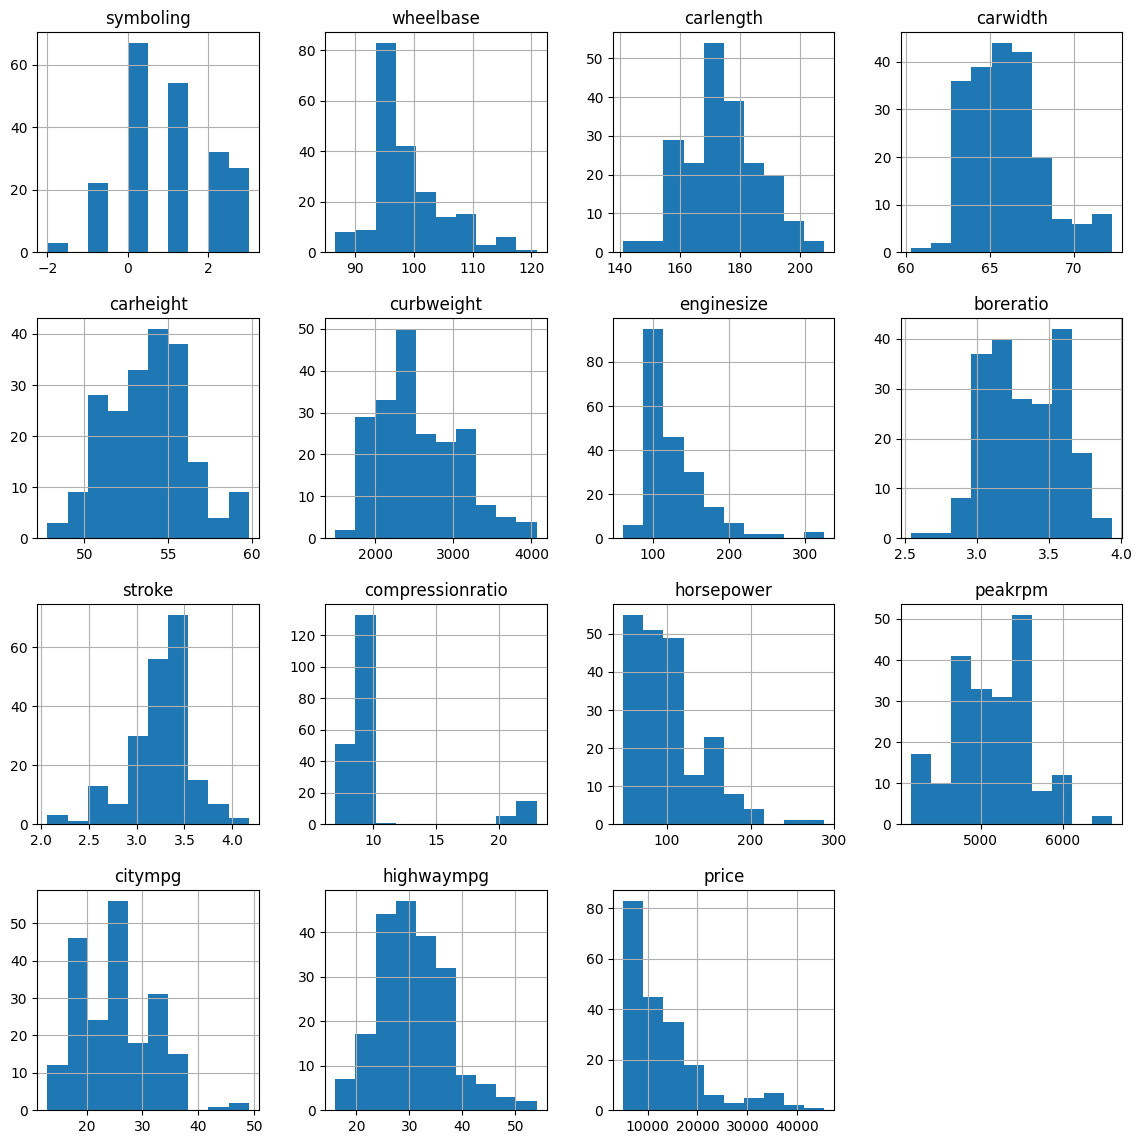

In [ ]:
car[numerical_columns].hist(figsize=(14, 14))
plt.show()

In [ ]:
categorical_variables = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'cylindernumber']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
pie_vars = ['fueltype', 'aspiration']

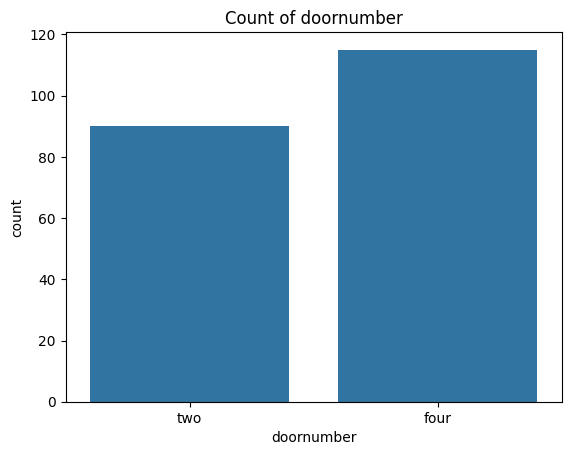

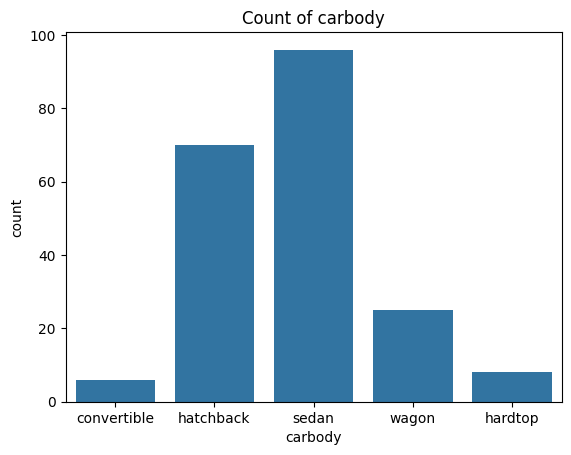

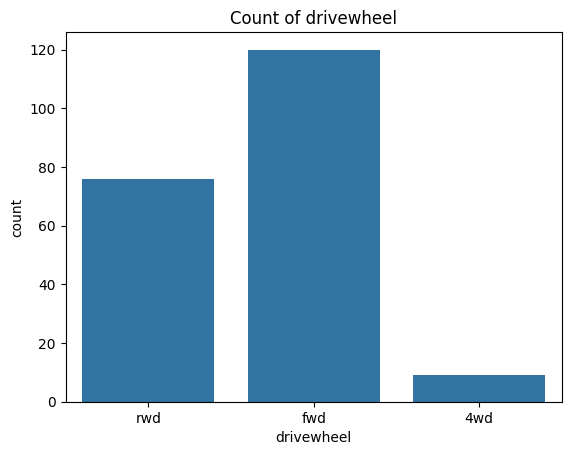

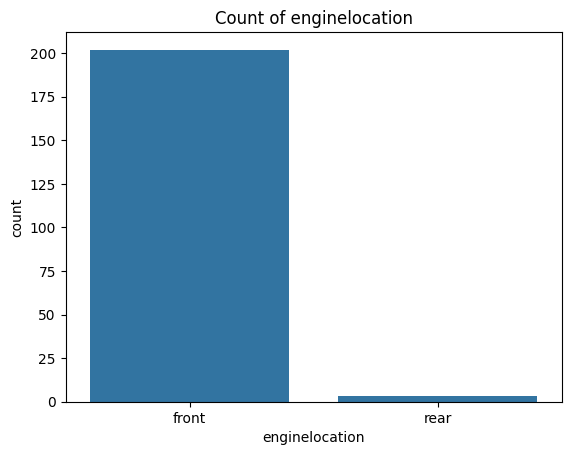

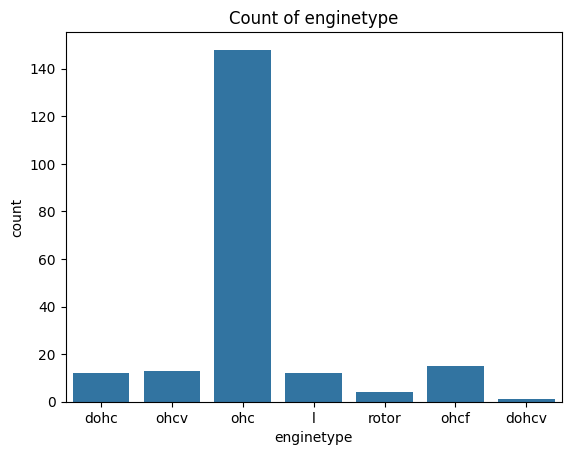

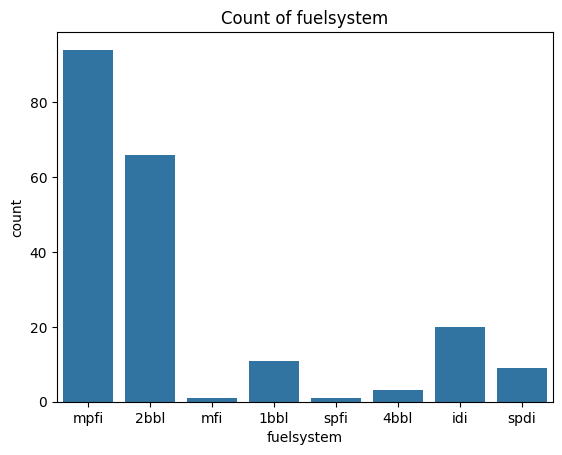

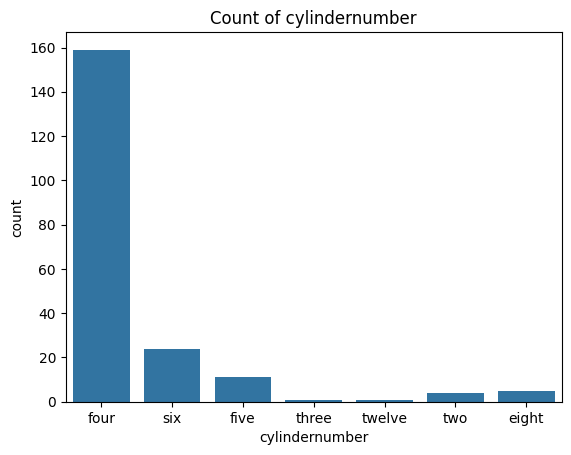

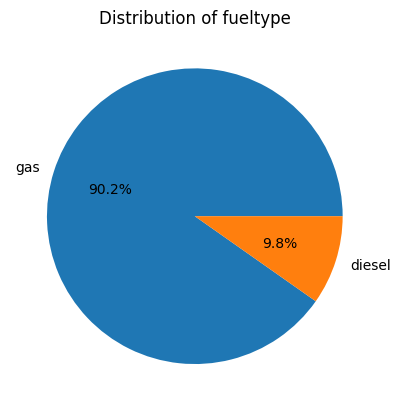

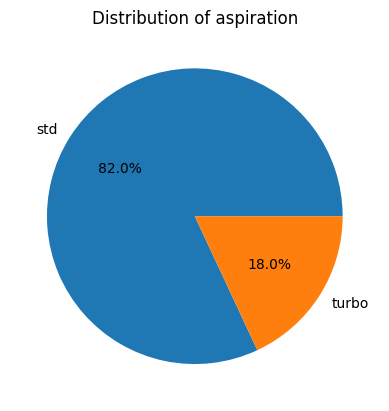

In [ ]:
for var in categorical_variables:
    if var not in pie_vars:
        sns.countplot(data=car, x=var)
        plt.title(f'Count of {var}')
        plt.show()

for var in pie_vars:
    plt.figure()
    car[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {var}')
    plt.ylabel('')
    plt.show()

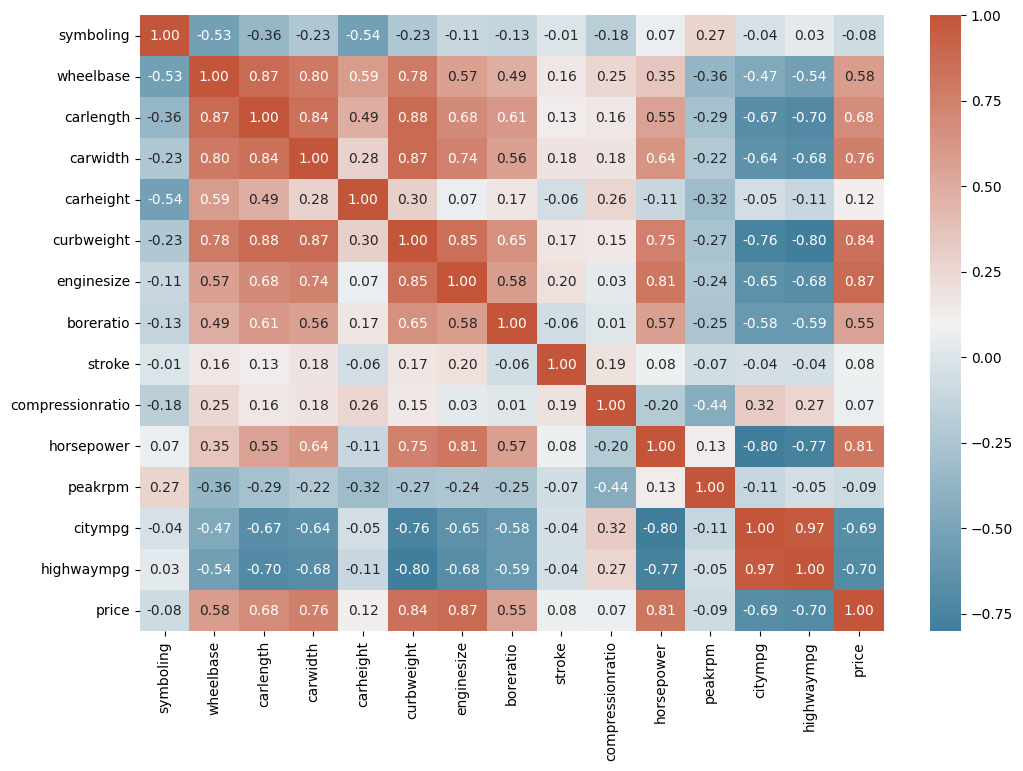

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Getting the Upper Triangle of the co-relation matrix
#matrix = np.triu(car.corr())

# Create a visual view of the pairwise correlations
sns.heatmap(car[numerical_columns].corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()

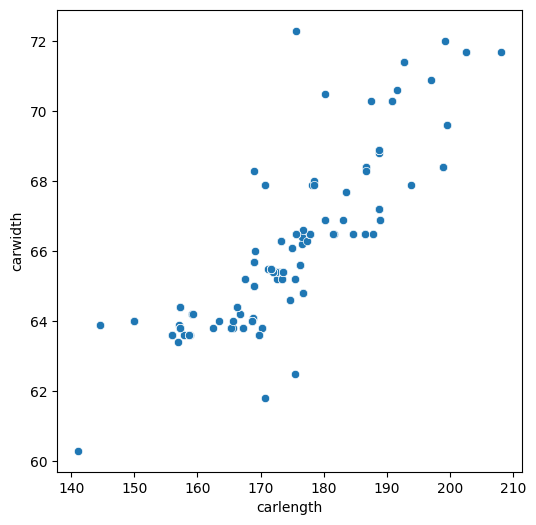

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=car, x='carlength', y='carwidth')
plt.show()

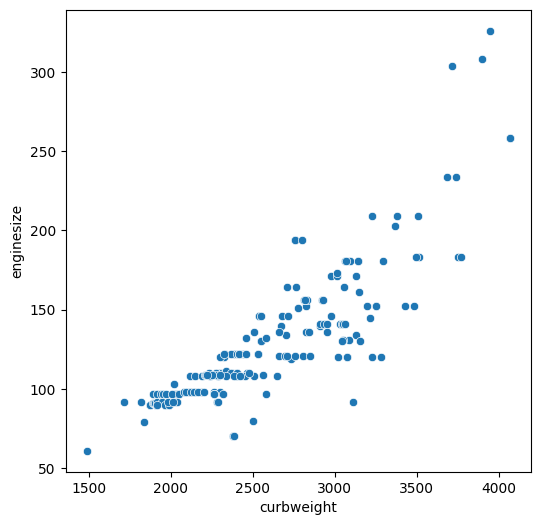

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=car, x='curbweight', y='enginesize')
plt.show()

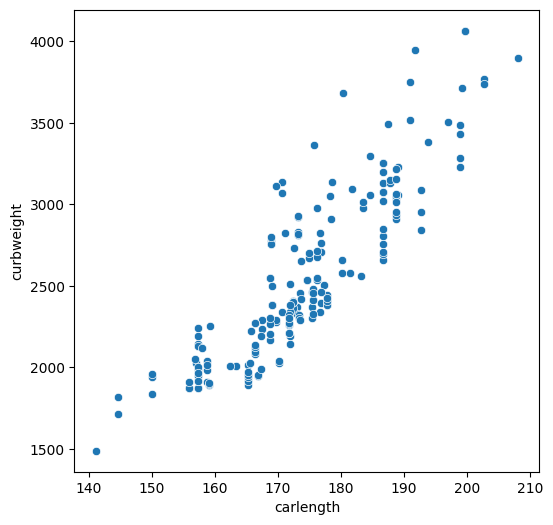

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=car, x='carlength', y='curbweight')
plt.show()

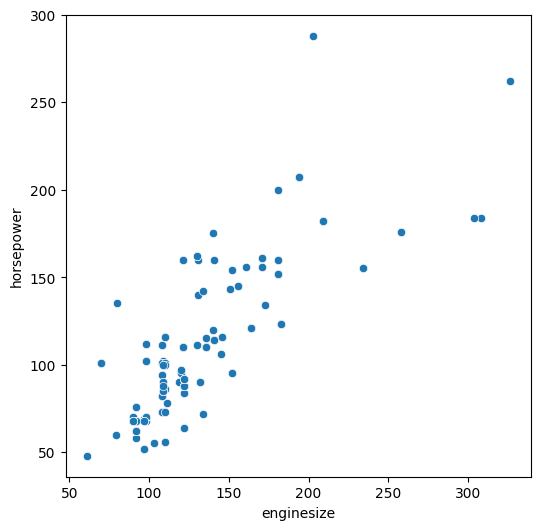

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=car, x='enginesize', y='horsepower')
plt.show()

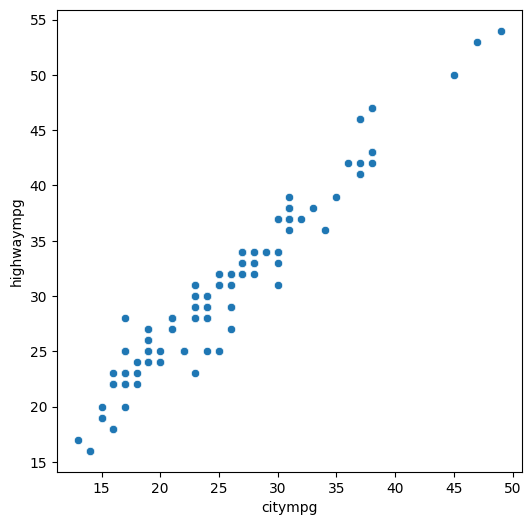

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=car, x='citympg', y='highwaympg')
plt.show()

In [ ]:
car = car.drop(columns=['symboling', 'wheelbase', 'boreratio', 'carheight', 'carwidth', 'carheight', 'enginesize', 'citympg'], axis=1)

In [ ]:
car['price_log'] = np.log(car['price'])

<Axes: xlabel='price_log', ylabel='Count'>

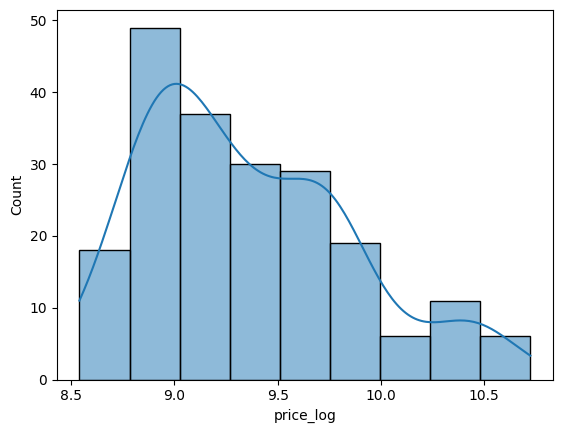

In [ ]:
sns.histplot(data=car, x='price_log', kde = True)

In [ ]:
car = pd.get_dummies(car)

In [ ]:
car.shape

(205, 195)

In [ ]:
y = car['price_log']
X = car.drop(columns = ['price', 'price_log'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr_train = lr.predict(X_train)

In [ ]:
mse_train = np.mean((y_pred_lr_train - y_train)**2)
print(mse_train)

0.0002773263476539273


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
mse = np.mean((y_pred-y_test)**2)

In [ ]:
print(mse)

1.194253438725952


In [ ]:
print('model intercept :', lr.intercept_)
print('model coefficients : ', lr.coef_)

model intercept : 10.168051978714518
model coefficients :  [ 2.22658321e-02 -1.51313970e-02  8.52023589e-04 -5.40545134e-02
 -1.03669442e-01  1.54260222e-03 -6.51081457e-05  3.71608377e-03
 -1.34394643e-01  2.44466899e+00  1.86282168e+00  2.04159698e+00
  2.87817920e+00  1.29418454e+00  1.11393627e+00  1.20075455e+00
  4.29071119e-01  1.08967474e+00  2.69783844e+00  2.48020666e+00
  2.57978009e+00  2.57962995e+00 -9.02515909e-14 -1.36088710e-12
  4.62099109e-13 -7.57465037e-01  7.60502772e-14  1.67144076e-13
  5.94256338e-01  6.41539020e-01 -4.86333693e-01 -4.25479175e-01
 -3.81916720e-14 -7.42184092e-14  1.59678226e+00  1.49232731e+00
  1.53231455e+00  1.42616141e+00  2.66453526e-15  7.46069873e-14
  1.27963181e+00  8.03523914e-15  1.47811366e+00  1.36953788e+00
  1.81944541e+00 -6.30051566e-15  3.65263375e-14  1.76465857e+00
  1.23590155e+00  5.88418203e-14  1.82737300e+00  2.29954944e-14
  1.74305015e-14  5.58644033e-01  1.30088432e+00  9.46235742e-01
  1.50541084e+00 -2.62290190e-1

In [ ]:
np.sqrt(((y_pred_lr_train - y_train) ** 2).mean())

0.01665311825616834

In [ ]:
np.sqrt(((y_test - y_pred) ** 2).mean())

1.0928190329262901

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor()

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_tree_train = tree.predict(X_train)

In [ ]:
mse_tree = np.mean((y_pred_tree_train-y_train)**2)
print(mse_tree)

0.0


In [ ]:
y_pred_tree = tree.predict(X_test)

In [ ]:
mse_tree = np.mean((y_pred_tree-y_test)**2)

In [ ]:
print(mse_tree)

0.035765456363559135


In [ ]:
np.sqrt(((y_test - y_pred_tree) ** 2).mean())

0.1891175728576251

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor()

In [ ]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_train_forest = forest.predict(X_train)

In [ ]:
mse_forest_train = np.mean((y_pred_train_forest-y_train)**2)
print(mse_forest_train)

0.0037210807050929184


In [ ]:
np.sqrt(((y_train - y_pred_train_forest) ** 2).mean())

0.06100066151356818

In [ ]:
y_pred_forest = forest.predict(X_test)

In [ ]:
mse_forest = np.mean((y_pred_forest-y_test)**2)

In [ ]:
print(mse_forest)

0.01960067213959445


In [ ]:
mse_forest = np.mean((y_pred_forest-y_test)**2)

In [ ]:
np.sqrt(((y_test - y_pred_forest) ** 2).mean())

0.140002400477972

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

-3.9818824139556908

In [ ]:
r2_score(y_pred_lr_train, y_train)

0.9989185385250983

In [ ]:
r2_score(y_test, y_pred_tree)

0.850802775770276

In [ ]:
r2_score(y_pred_tree_train, y_train)

1.0

In [ ]:
r2_score(y_test, y_pred_forest)

0.9182349067061264

In [ ]:
r2_score(y_train, y_pred_train_forest)

0.9855049542176987

In [ ]:
features = pd.Series(forest.feature_importances_, index=X_train.columns)
features.sort_values(ascending=False, inplace=True)
print(features)

curbweight                  0.642608
highwaympg                  0.150788
horsepower                  0.102810
car_ID                      0.026124
carlength                   0.015870
                              ...   
CarName_bmw z4              0.000000
CarName_bmw x5              0.000000
CarName_jaguar xj           0.000000
CarName_maxda glc deluxe    0.000000
CarName_subaru tribeca      0.000000
Length: 193, dtype: float64
